# Load the required data and code



In [1]:
!git clone https://github.com/Shirley-Kokane/GLOW-GAN

Cloning into 'GLOW-GAN'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 95 (delta 6), reused 0 (delta 0), pack-reused 71
Unpacking objects: 100% (95/95), done.


In [2]:
cd GLOW-GAN

/content/GLOW-GAN


In [3]:
cd results/celeba

/content/GLOW-GAN/results/celeba


# Load the pretrained model

In [4]:
!wget https://www.dropbox.com/s/3wx7vmsurjzfelm/trained.pkg

--2022-05-08 23:21:48--  https://www.dropbox.com/s/3wx7vmsurjzfelm/trained.pkg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3wx7vmsurjzfelm/trained.pkg [following]
--2022-05-08 23:21:48--  https://www.dropbox.com/s/raw/3wx7vmsurjzfelm/trained.pkg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc98b35fef7527fe9a5a825e989a.dl.dropboxusercontent.com/cd/0/inline/Bk6oi5OZsCZGpGIwsM3Vr5vFy1EfbtjQ85lGt79BpsuacxUZJ56eWqZqHKgkV-z8LKcdL3TdCsSZKibwIaU9P9ESc6kLaBmZoIhsCR1u9Jvr6bqvR53v3a2quwZpgX31PueAlUDYdo4b6IJIsEVRT3CioutbL2ZAZGFkEsgCqlS2zA/file# [following]
--2022-05-08 23:21:49--  https://uc98b35fef7527fe9a5a825e989a.dl.dropboxusercontent.com/cd/0/inline/Bk6oi5OZsCZGpGIwsM3Vr5vFy1EfbtjQ85lGt79BpsuacxUZJ56eWqZqHKgkV-z8LKcdL3T

In [5]:
cd /content/GLOW-GAN

/content/GLOW-GAN


# Download the Dataset

In [6]:
!mkdir data_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip 

--2022-05-08 23:22:50--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.117.144
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.117.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip’

celeba.zip          100%[===================>]   1.34G  21.6MB/s    in 67s     

2022-05-08 23:23:58 (20.5 MB/s) - ‘celeba.zip’ saved [1443490838/1443490838]



In [7]:
import zipfile

with zipfile.ZipFile("celeba.zip","r") as zip_ref:
  zip_ref.extractall("data_faces/")

In [8]:
import os
root = 'data_faces/img_align_celeba'
img_list = os.listdir(root)
print(len(img_list))

202599


In [9]:
cd data_faces/img_align_celeba/

/content/GLOW-GAN/data_faces/img_align_celeba


# Herein we download the text file where we have the one hot encoded latent attributes for every image

In [10]:
!gdown --id 1NM3it2Q5XsBtDexJ55FMSE2-x8gIsQSs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NM3it2Q5XsBtDexJ55FMSE2-x8gIsQSs
To: /content/GLOW-GAN/data_faces/img_align_celeba/list_attr_celeba.txt
100% 26.5M/26.5M [00:00<00:00, 291MB/s]


In [11]:
cd /content/GLOW-GAN

/content/GLOW-GAN


## Herein we can select the index of the image and the index of the latent attribute we can manipulate

In [13]:
!python infer_celeba.py "hparams/celeba.json" "data_faces/img_align_celeba" "celeba_z"

Load Z from celeba_z
[Builder]: Found 1 gpu
[Builder]: cuda:1 is not found, ignore.
[Builder]: cuda:2 is not found, ignore.
[Builder]: cuda:3 is not found, ignore.
[Checkpoint]: Load ./results/celeba/trained.pkg successfully
[Builder]: Use cuda [0] to train, use 0 to load data and get loss.
Begin to parse all image attrs
Find 202599 images, with 40 attrs
Select base image with index [0, 202599),or -1 for random selection
5
Select attritube with index [0, 40),or -1 for random selection
0: 5_o_Clock_Shadow
1: Arched_Eyebrows
2: Attractive
3: Bags_Under_Eyes
4: Bald
5: Bangs
6: Big_Lips
7: Big_Nose
8: Black_Hair
9: Blond_Hair
10: Blurry
11: Brown_Hair
12: Bushy_Eyebrows
13: Chubby
14: Double_Chin
15: Eyeglasses
16: Goatee
17: Gray_Hair
18: Heavy_Makeup
19: High_Cheekbones
20: Male
21: Mouth_Slightly_Open
22: Mustache
23: Narrow_Eyes
24: No_Beard
25: Oval_Face
26: Pale_Skin
27: Pointy_Nose
28: Receding_Hairline
29: Rosy_Cheeks
30: Sideburns
31: Smiling
32: Straight_Hair
33: Wavy_Hair
34: W

In [14]:
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

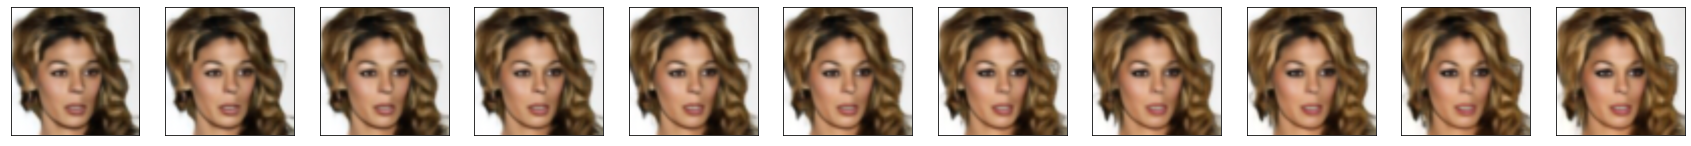

In [17]:
c =0
plt.rcParams["figure.figsize"] = (30,30)
for i in range(0,11):
  c = c +1
  image_path = os.path.join('pictures/infer/','attr_Wearing_Necklace_{}.png'.format(i))
  im = mpimg.imread(image_path)
  
  plt.subplot(1, 11, c)
  plt.xticks([])
  plt.yticks([])
#plt.plot(x,y)
  
  plt.imshow(im)
plt.show()